<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [4]:
# Importing pandas library
import pandas as pd

# Path to the CSV file
file= 'dataset.csv'

# Reading the CSV into a DataFrame
# Assuming the first row contains the headers
df = pd.read_csv(file, header=0)

# Printing the first 5 rows of the DataFrame
print(df.head())

<ipython-input-4-880cfba97371>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [8]:
missing_values = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_values)

# Replace missing values with column mean
Mean_value = df['tax'].mean()
df['tax'].fillna(Mean_value, inplace=True)

df_no_duplicates = df.drop_duplicates()

# Print the DataFrame after removing duplicates
print("\nDataFrame after removing duplicates:")
print(df_no_duplicates)


Columns with missing values: Index([], dtype='object')


<ipython-input-8-c487b8b8a1f7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tax'].fillna(Mean_value, inplace=True)



DataFrame after removing duplicates:
         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0       Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1        Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2        Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3       Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4       Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17961    B-MAX  2017       Manual    16700   Petrol  150.0  47.1         1.4   
17962    B-MAX  2014       Manual    40700   Petrol   30.0  57.7         1.0   
17963    Focus  2015       Manual     7010   Diesel   20.0  67.3         1.6   
17964       KA  2018       Manual     5007   Petrol  145.0  57.7         1.2   
17965    Focus  2015       Manual     5007   Petrol   22.0  57.7         1.0   

 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17966 non-null  float64
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.0+ MB


In [15]:
import numpy as np

# Assuming the DataFrame 'df' is already loaded from the previous scripts
# If not, you'd need to rerun the script that reads the CSV file
# Also, assume the target column is named 'target'

# Encode categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType'], drop_first=True)

# Calculate correlation with the target attribute 'Price'
correlation_with_target = df_encoded.corr()['price'].abs().sort_values(ascending=False)

# Exclude the target itself and get the top 5 attributes
top_5_attributes = correlation_with_target[1:6]

print("Top 5 attributes with the highest correlation to 'Price':")
print(top_5_attributes)

Top 5 attributes with the highest correlation to 'Price':
year          0.636009
mileage       0.530659
engineSize    0.411178
tax           0.406859
mpg           0.346419
Name: price, dtype: float64


In [16]:
# Count the occurrences of each unique value in the specified column
value_counts = df['fuelType'].value_counts()

# Print the result
print("\nCounts of unique values in column '{}'".format('fuelType'))
print(value_counts)


Counts of unique values in column 'fuelType'
fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


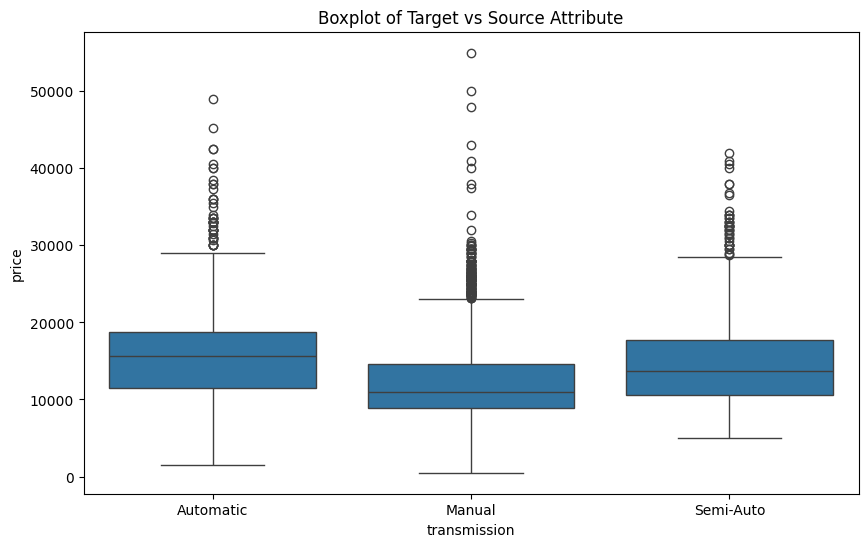

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded from the previous scripts
# If not, you'd need to rerun the script that reads the CSV file

# Define source and target attribute names
source_attribute = 'transmission'  # Replace 'source_column' with actual column name
target_attribute = 'price'  # Replace 'target_column' with actual column name

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=source_attribute, y=target_attribute, data=df)

# Set plot title and labels
plt.title('Boxplot of Target vs Source Attribute')
plt.xlabel(source_attribute)
plt.ylabel(target_attribute)

# Show the plot
plt.show()

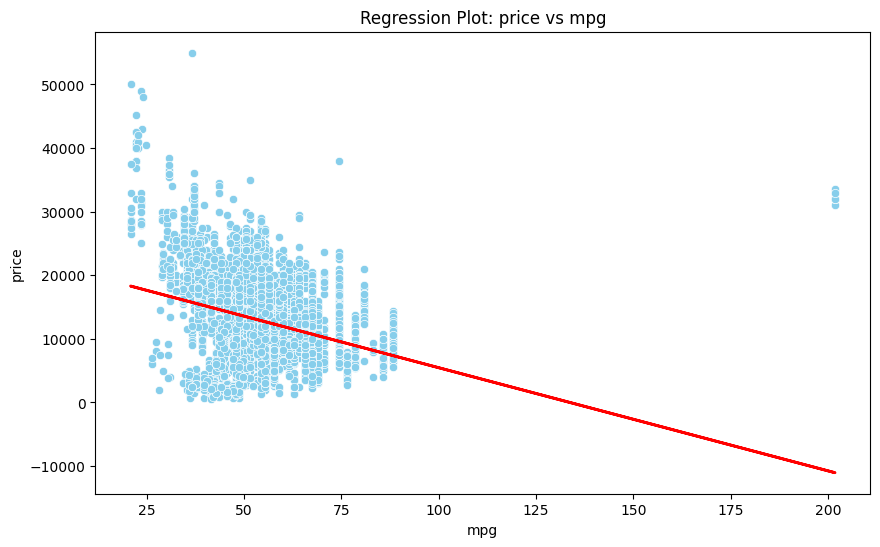

In [18]:
from scipy.stats import linregress

# Assuming the DataFrame 'df' is already loaded from the previous scripts
# If not, you'd need to rerun the script that reads the CSV file

# Define source and target attribute names
source_attribute = 'mpg'  # Replace 'source_column' with actual column name
target_attribute = 'price'  # Replace 'target_column' with actual column name

# Create a scatter plot of source vs target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=source_attribute, y=target_attribute, data=df, color='skyblue')

# Calculate the regression line
result = linregress(df[source_attribute], df[target_attribute])

# Generate regression line
x_line = pd.Series(df[source_attribute])
y_line = result.intercept + result.slope * x_line

# Plot the regression line
plt.plot(x_line, y_line, color='red', linewidth=2)

# Set plot title and labels
plt.title(f'Regression Plot: {target_attribute} vs {source_attribute}')
plt.xlabel(source_attribute)
plt.ylabel(target_attribute)

# Show the plot
plt.show()

In [19]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming the DataFrame 'df' is already loaded from the previous scripts
# If not, you'd need to rerun the script that reads the CSV file

# Define source and target attribute names
source_attribute = 'mpg'  # Replace 'source_column' with actual column name
target_attribute = 'price'  # Replace 'target_column' with actual column name

# Specify independent (source) and dependent (target) variables
X = df[[source_attribute]]  # Independent variable(s)
y = df[target_attribute]    # Dependent variable

# Add a constant to the independent variable (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Extract R-squared value
r_squared = model.rsquared
print("\nR-squared value: ", r_squared)

# Extract Mean Squared Error (MSE)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE): ", mse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     2450.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:55:48   Log-Likelihood:            -1.7641e+05
No. Observations:               17966   AIC:                         3.528e+05
Df Residuals:                   17964   BIC:                         3.528e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.167e+04    192.657    112.493      0.0

In [21]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming the DataFrame 'df' is already loaded from the previous scripts
# If not, you'd need to rerun the script that reads the CSV file

# Define the list of source attribute names
source_attributes = ['year', 'mileage', 'tax','mpg','engineSize']  # Replace with actual column names
# Define the target attribute name
target_attribute = 'price'  # Replace with actual column name

# Specify independent (source) and dependent (target) variables
X = df[source_attributes]  # Independent variables
y = df[target_attribute]    # Dependent variable

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Extract R-squared value
r_squared = model.rsquared
print("\nR-squared value: ", r_squared)

# Extract Mean Squared Error (MSE)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE): ", mse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     9553.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:02:56   Log-Likelihood:            -1.6590e+05
No. Observations:               17966   AIC:                         3.318e+05
Df Residuals:                   17960   BIC:                         3.319e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.445e+06   2.66e+04    -91.740      0.0

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score



# Define source attributes (features) and target variable
X = df[['year', 'mileage', 'tax','mpg','engineSize']]  # Source attributes
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('poly', PolynomialFeatures(degree=2)),  # Create second-degree polynomial features
    ('linear_regression', LinearRegression())  # Linear regression model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)  # R^2 score
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 Score: 0.7526754379306997
Mean Squared Error (MSE): 5543050.866814759


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define source attributes (features) and target variable
X = df[['year', 'mileage', 'tax','mpg','engineSize']] # Source attributes
y = df['price']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)  # Regularization parameter alpha=0.1
ridge_model.fit(X_train, y_train)  # Fit the model to the training data

# Predict on the testing data
y_pred = ridge_model.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R^2 score

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 6148225.584407105
R^2 Score: 0.7256732372292748


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define source attributes (features) and target variable
X = df[['year', 'mileage', 'tax','mpg','engineSize']] # Source attributes
y = df['price']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second-degree polynomial scaling
poly = PolynomialFeatures(degree=2)  # Second-degree polynomial features
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform testing data

# Create and fit a Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)  # Regularization parameter alpha=0.1
ridge_model.fit(X_train_poly, y_train)  # Fit the model to the polynomial training data

# Predict on the polynomial testing data
y_pred = ridge_model.predict(X_test_poly)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R^2 score

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.24869e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Mean Squared Error (MSE): 5546814.71399673
R^2 Score: 0.7525074993931788


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
